<a href="https://colab.research.google.com/github/DikshyaGurung/AI/blob/main/2418265_Dikshya_Gurung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Assessment1

/content/drive/MyDrive/Assessment1


In [ ]:
!ls

2418265_Dikshya_Gurung.ipynb  south_asia_happiness.csv	WHR-2024-5CS037.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
df = pd.read_csv('WHR-2024-5CS037.csv')

# Display the first 10 rows
df.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
# Identify the number of rows and columns
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# List all the columns and their data types
print("\nColumns and Data Types:")
df.dtypes


Number of rows: 143
Number of columns: 9

Columns and Data Types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
# Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"\nMean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

# Identify the country with the highest and lowest happiness scores.
highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]

print(f"\nCountry with the highest happiness score:\n{highest_score_country[['Country name','score']]}")
print(f"\nCountry with the lowest happiness score:\n{lowest_score_country[['Country name','score']]}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995

Country with the highest happiness score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
# Check for missing values and display the count for each column
missing_values = df.isnull().sum()
print("\nMissing Values per column:")
print(missing_values[missing_values > 0])


Missing Values per column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
# Filter the dataset to show only the countries with a Score greater than 7.5.
filter_df = df[df['score'] > 7.5]

# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows.
top_10_gdp = filter_df.sort_values(by='Log GDP per capita', ascending=False).head(10)

print("\nTop 10 countries by GDP per Capita (Score > 7.5):")
top_10_gdp


Top 10 countries by GDP per Capita (Score > 7.5):


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


# Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
# Create the 'Happiness Category' column based on the 'Score' column
def happiness_categorization(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_categorization)

# Display the updated DataFrame with the new column
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


2. Data Visualizations:


#Bar Plot:

Plot the top 10 happiest countries by Score using a bar chart.

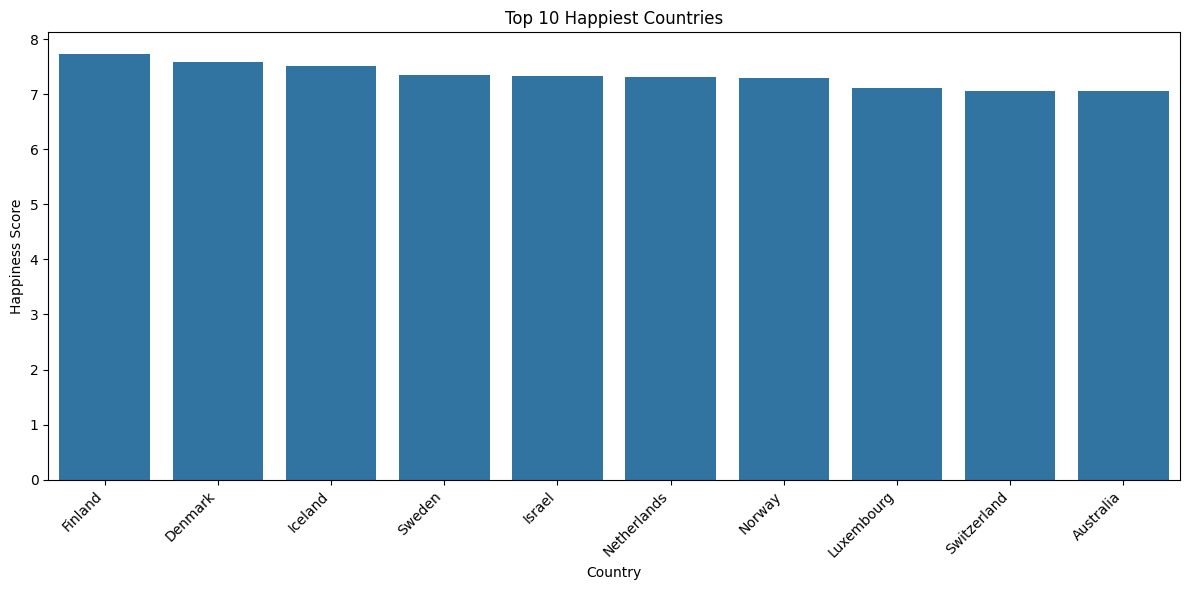

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'score' in descending order and get the top 10
top_10_happiest = df.sort_values('score', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Line Plot:
Plot the top 10 unhappiest countries by Score using a Line chart.

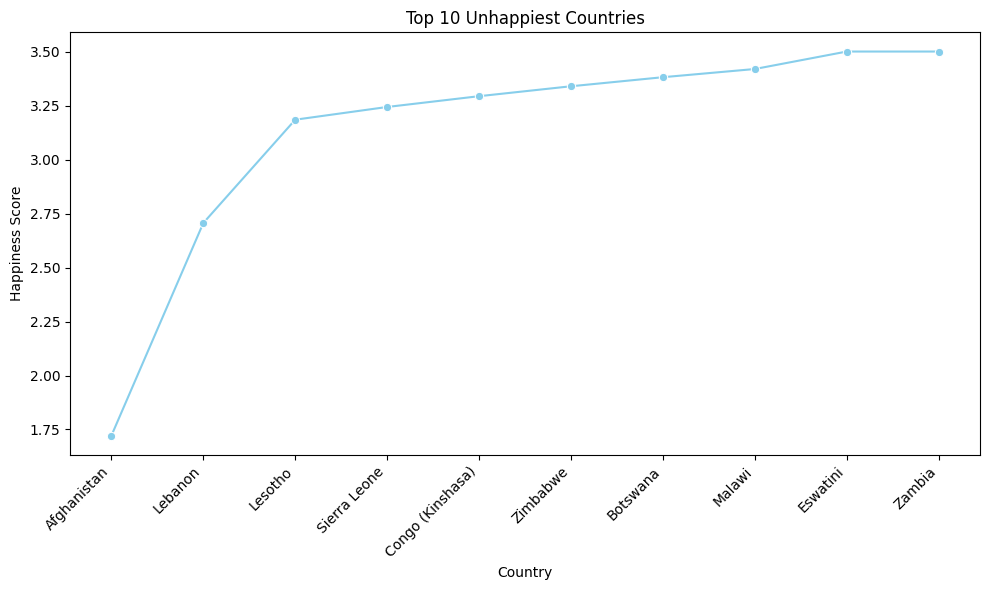

In [ ]:
# Sort the DataFrame by 'score' in ascending order and get the top 10
bottom_10_happiest = df.sort_values('score', ascending=True).head(10)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=bottom_10_happiest, marker='o', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Plot a histogram
for the Score column to show its distribution and also interpret.

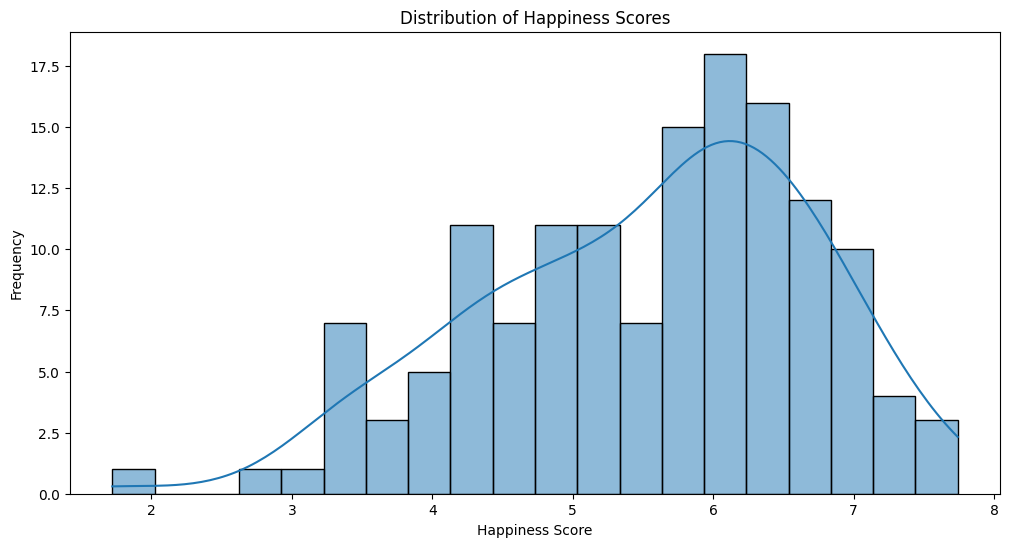

In [ ]:
# Plot a histogram for the Score column
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot:
Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

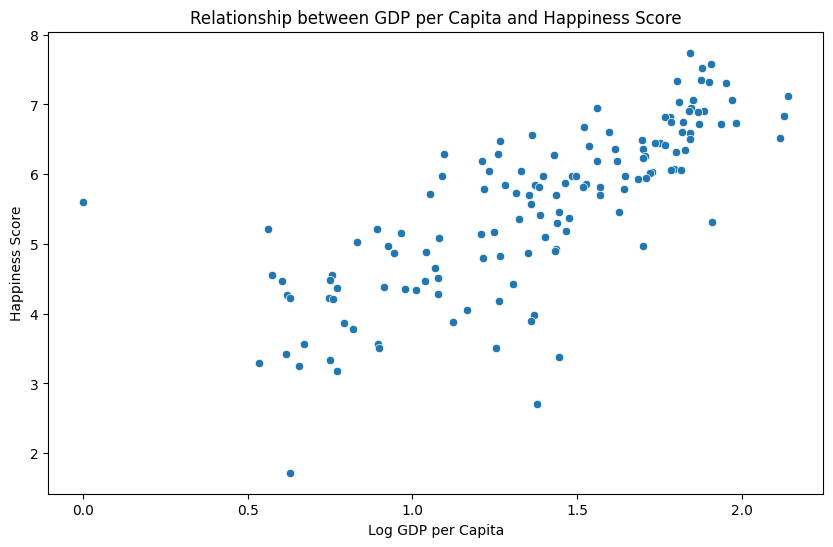

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

#Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the DataFrame to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered DataFrame to a CSV file
south_asia_df.to_csv('south_asia_happiness.csv', index=False)
print("Filtered South Asia dataset saved as 'south_asia_happiness.csv'")

Filtered South Asia dataset saved as 'south_asia_happiness.csv'


#Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy

2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# Calculate the Composite Score
south_asia_df.loc[:,'Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df['Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])

# Rank the countries based on the Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the ranked DataFrame
south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

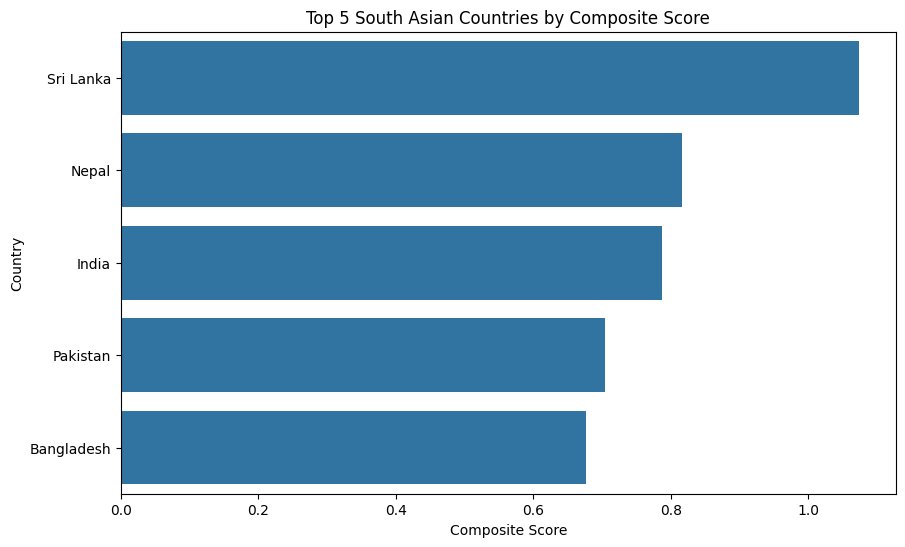

In [ ]:
# prompt: Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

# Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_countries = south_asia_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

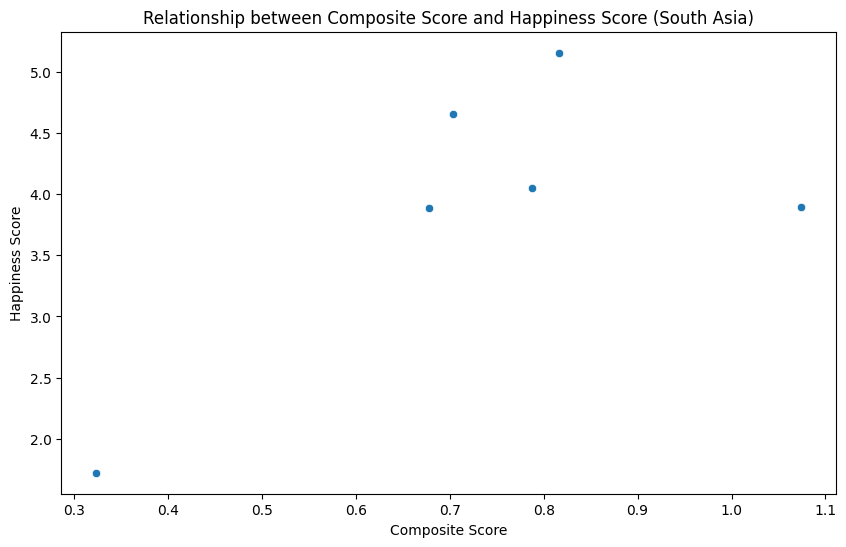

Correlation between Composite Score and Happiness Score: 0.6843877715791373


In [ ]:
# Create a scatter plot to visualize the relationship between 'Composite Score' and 'Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df)
plt.title('Relationship between Composite Score and Happiness Score (South Asia)')
plt.xlabel('Composite Score')
plt.ylabel('Happiness Score')
plt.show()

# Calculate the correlation between 'Composite Score' and 'score'
correlation = south_asia_df['Composite Score'].corr(south_asia_df['score'])
print(f"Correlation between Composite Score and Happiness Score: {correlation}")

The scatter plot shows the relationship between the original happiness score and the composite score. We can observe that there's no clear correlation between the two. Some countries rank higher/lower in the composite score compared to the original score. For example Srilanka has a high composite score but a relatively low happiness score. This might be due to high GDP per capital.While Nepal has a lower composite score despite having a higher happiness score than Srilanka which might be due to low GDP per capita. These differences highlight how the composite score prioritizes specific aspects of wellbeing like economic factors and health, while the original happiness score might include other elements not captured by our composite score.

#Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
south_asia_df_cleaned = south_asia_df.dropna(subset=['score', 'Log GDP per capita'])

# Define the outlier identification function using Z-scores
def identify_outliers(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std_dev = data.std()

    # Calculate Z-scores
    z_scores = (data - mean) / std_dev

    # Define outliers (Z-scores greater than 3 or less than -3)
    outliers = (z_scores > 3) | (z_scores < -3)

    return outliers

# Now, you can apply the identify_outliers function
score_outliers = identify_outliers(south_asia_df_cleaned['score'])
print("Outlier Countries based on Score:\n", south_asia_df_cleaned.loc[score_outliers.index, 'Country name'])

gdp_outliers = identify_outliers(south_asia_df_cleaned['Log GDP per capita'])
print("\nOutlier Countries based on GDP per Capita:\n", south_asia_df_cleaned.loc[gdp_outliers.index, 'Country name'])


Outlier Countries based on Score:
 127      Sri Lanka
92           Nepal
125          India
107       Pakistan
128     Bangladesh
142    Afghanistan
Name: Country name, dtype: object

Outlier Countries based on GDP per Capita:
 127      Sri Lanka
92           Nepal
125          India
107       Pakistan
128     Bangladesh
142    Afghanistan
Name: Country name, dtype: object


2. Define outliers using the 1.5 × IQR rule.

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Example usage (already in the provided code):
score_outliers = identify_outliers(south_asia_df['score'])
gdp_outliers = identify_outliers(south_asia_df['Log GDP per capita'])

print("Outlier Countries based on Score:\n", south_asia_df.loc[score_outliers.index, 'Country name'])
print("\nOutlier Countries based on GDP per Capita:\n", south_asia_df.loc[gdp_outliers.index, 'Country name'])

Outlier Countries based on Score:
 142    Afghanistan
Name: Country name, dtype: object

Outlier Countries based on GDP per Capita:
 142    Afghanistan
Name: Country name, dtype: object


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

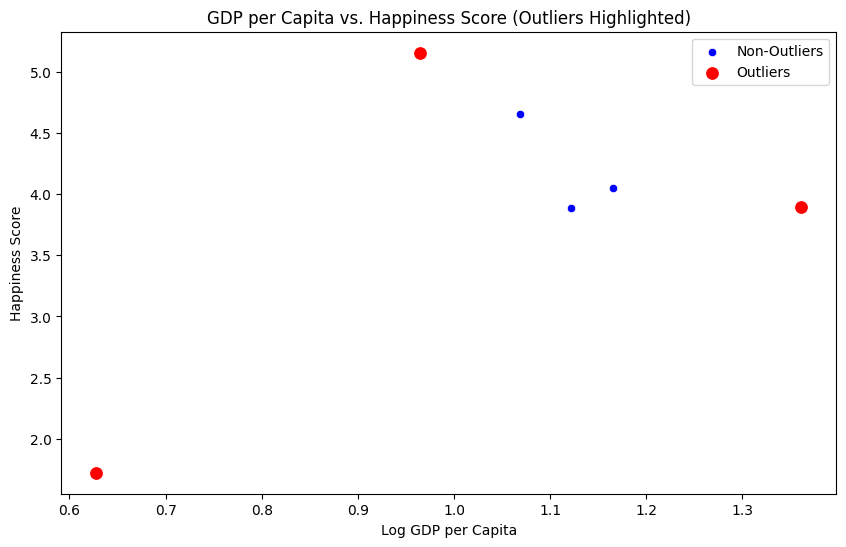

In [ ]:
plt.figure(figsize=(10, 6))

# Plot all data points
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='blue', label='Non-Outliers')

# Highlight outliers in red
outliers_combined = south_asia_df[
    (south_asia_df['score'] < south_asia_df['score'].quantile(0.05)) |
    (south_asia_df['score'] > south_asia_df['score'].quantile(0.95)) |
    (south_asia_df['Log GDP per capita'] < south_asia_df['Log GDP per capita'].quantile(0.05)) |
    (south_asia_df['Log GDP per capita'] > south_asia_df['Log GDP per capita'].quantile(0.95))
]
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_combined, color='red', label='Outliers', s=100)

plt.title('GDP per Capita vs. Happiness Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

#Outlier Characteristics:

 Based on the analysis, outlier countries in South Asia, as identified by both Z-score and IQR methods, exhibit extreme values in either happiness score or GDP per capita, or both.  For example, some nations might have exceptionally high GDP per capita but relatively low happiness scores, or vice-versa.  These deviations from the general trend suggest unique socio-economic circumstances within these countries.

# Potential Impact on Regional Averages:
 Outliers can significantly skew regional averages, particularly the mean.  Because the mean is sensitive to extreme values, the presence of outliers can inflate or deflate the regional average, potentially misrepresenting the typical happiness or economic well-being of the region.  The median, being less susceptible to extreme values, provides a more robust measure of central tendency in the presence of outliers.  Therefore, relying solely on the mean to characterize regional happiness or economic development in South Asia might be misleading; considering both the mean and median, along with visualizing the data (as done with the scatter plots), provides a more comprehensive understanding.



#Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [ ]:
# Calculate the Pearson correlation between 'Freedom to make life choices', 'Generosity' and 'Score'
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'], method='pearson')
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'], method='pearson')

print(f"Pearson correlation between Freedom to make life choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")

Pearson correlation between Freedom to make life choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

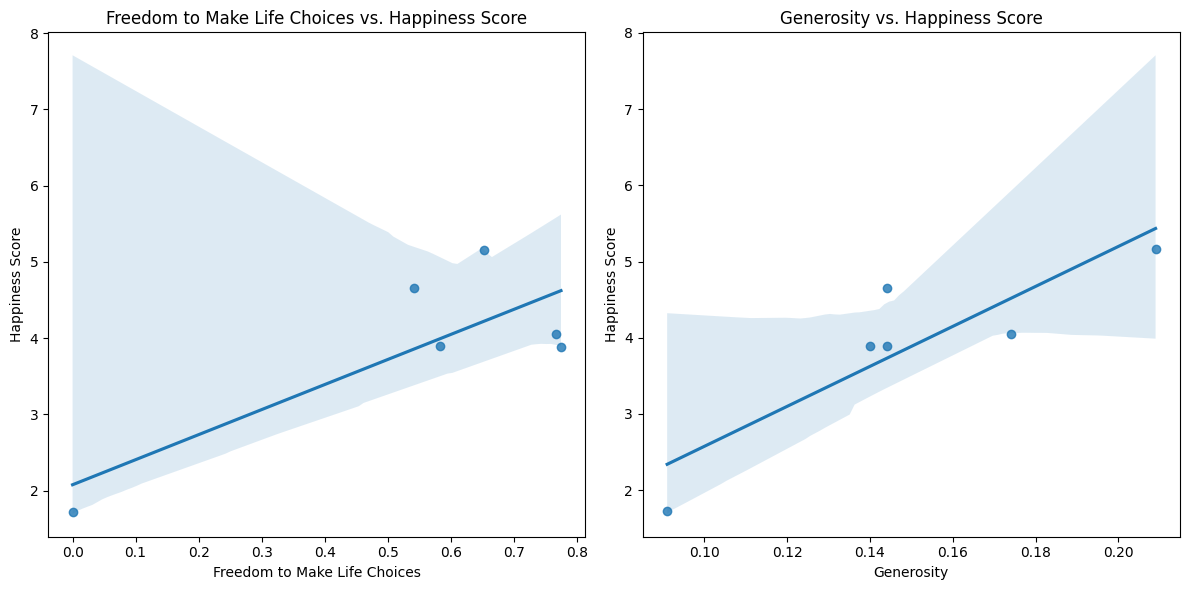

In [ ]:
# Create scatter plots with trendlines
plt.figure(figsize=(12, 6))

# Scatter plot for Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')


# Scatter plot for Generosity
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df)
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [ ]:
# Discuss strongest and weakest relationships
print("\nDiscussion:")
if abs(correlation_freedom) > abs(correlation_generosity):
    print(f"The strongest relationship is between Generosity and Score, with a correlation of {correlation_freedom}.")
    print(f"The weakest relationship is between Freedom to Make Life Choices and Score, with a correlation of {correlation_generosity}.")
else:
    print(f"The strongest relationship is between Freedom to Make Life Choices and Score, with a correlation of {correlation_generosity}.")
    print(f"The weakest relationship is between Generosity and Score, with a correlation of {correlation_freedom}.")


Discussion:
The strongest relationship is between Freedom to Make Life Choices and Score, with a correlation of 0.874512371253192.
The weakest relationship is between Generosity and Score, with a correlation of 0.8005185224163315.


#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.


In [ ]:
# Calculate the GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated DataFrame
south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


2. Rank the South Asian countries by this gap in both ascending and descending order.


In [ ]:
# Remove rows with NaN values in the 'GDP-Score Gap' column
south_asia_df_cleaned = south_asia_df.dropna(subset=['GDP-Score Gap'])

# Rank the South Asian countries by GDP-Score Gap in ascending order
ascending_rank = south_asia_df_cleaned.sort_values(by='GDP-Score Gap', ascending=True)
print("Ascending Order:\n", ascending_rank[['Country name', 'GDP-Score Gap']])

# Rank the South Asian countries by GDP-Score Gap in descending order
descending_rank = south_asia_df_cleaned.sort_values(by='GDP-Score Gap', ascending=False)
print("\nDescending Order:\n", descending_rank[['Country name', 'GDP-Score Gap']])


Ascending Order:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Descending Order:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

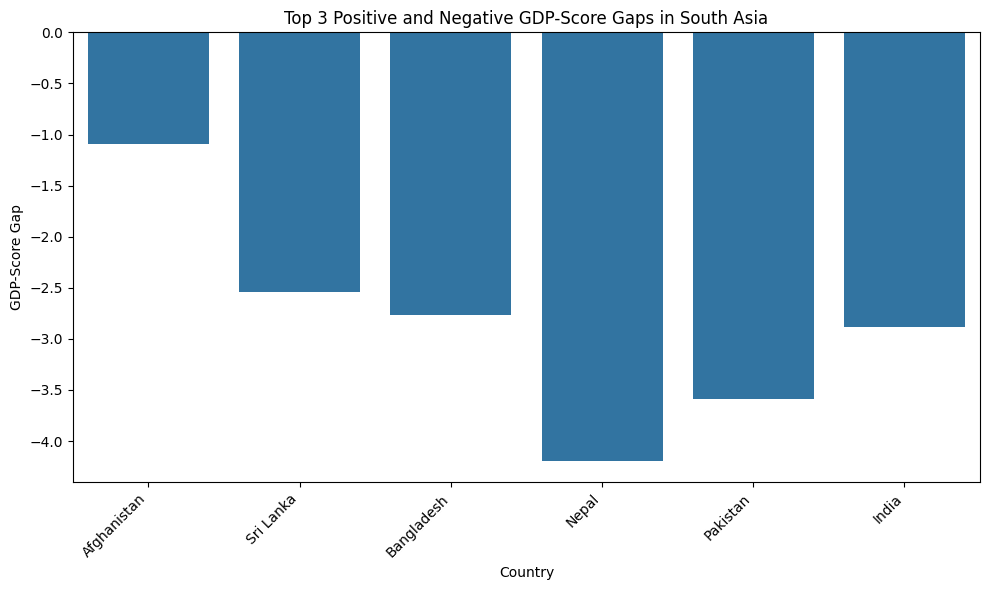

In [ ]:
# Get the top 3 countries with the largest positive gaps
top_3_positive = south_asia_df_cleaned.nlargest(3, 'GDP-Score Gap')

# Get the top 3 countries with the largest negative gaps
top_3_negative = south_asia_df_cleaned.nsmallest(3, 'GDP-Score Gap')

# Combine the two dataframes
top_6_gaps = pd.concat([top_3_positive, top_3_negative])

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_6_gaps)
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

# Positive Gaps:
A positive gap means that the country's actual GDP exceeds expectations based on its "Score" (possibly a metric like happiness or well-being). These bars are positioned above the zero line on the chart.

In this graph:
Positive bars will extend upwards from zero.

# Reasons for Negative Gaps:
A negative gap means that the country's GDP is lower than expected based on its "Score." These bars are positioned below the zero line on the chart.

In this graph:
Negative bars will extend downwards from zero.

#Implications:
Focus on Inclusive Growth: Policymakers should emphasize redistributing economic benefits to improve public health, education, and quality of life.

Social and Environmental Priorities: Large positive gaps may indicate a need to balance economic activities with sustainability and social investments.


#Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [ ]:
# Define the list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the DataFrame to include only Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Calculate the mean and standard deviation of the score for both regions
mean_score_south_asia = south_asia_df['score'].mean()
std_dev_score_south_asia = south_asia_df['score'].std()

mean_score_middle_east = middle_east_df['score'].mean()
std_dev_score_middle_east = middle_east_df['score'].std()

print(f"South Asia - Mean Happiness Score: {mean_score_south_asia:.2f}")
print(f"South Asia - Standard Deviation: {std_dev_score_south_asia:.2f}")
print(f"Middle East - Mean Happiness Score: {mean_score_middle_east:.2f}")
print(f"Middle East - Standard Deviation: {std_dev_score_middle_east:.2f}")

# Determine which region has a higher average happiness score
if mean_score_south_asia > mean_score_middle_east:
    print("\nSouth Asia has a higher average happiness score.")
elif mean_score_middle_east > mean_score_south_asia:
    print("\nMiddle East has a higher average happiness score.")
else:
    print("\nBoth regions have the same average happiness score.")

South Asia - Mean Happiness Score: 3.90
South Asia - Standard Deviation: 1.18
Middle East - Mean Happiness Score: 5.41
Middle East - Standard Deviation: 1.57

Middle East has a higher average happiness score.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

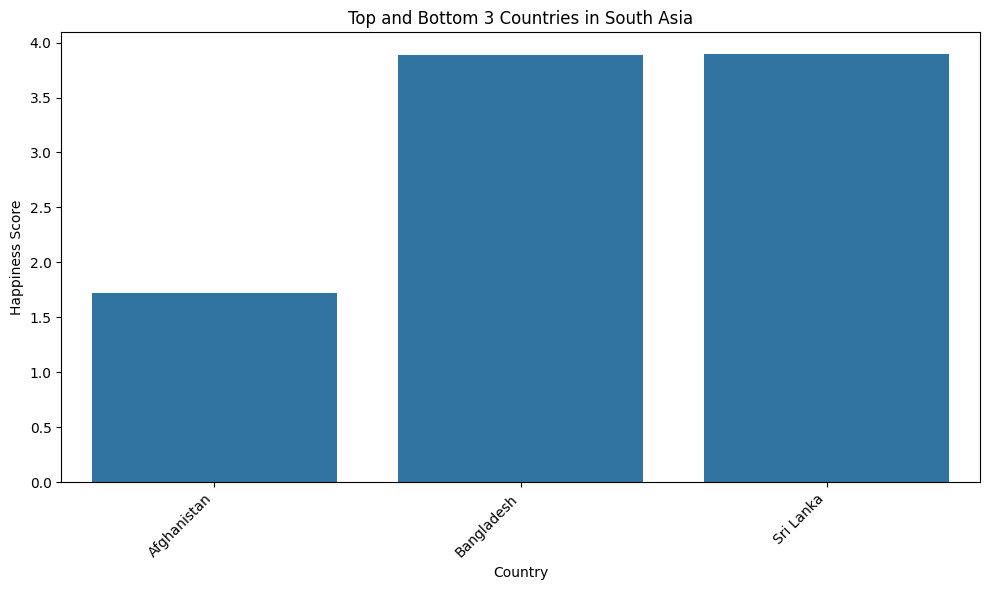

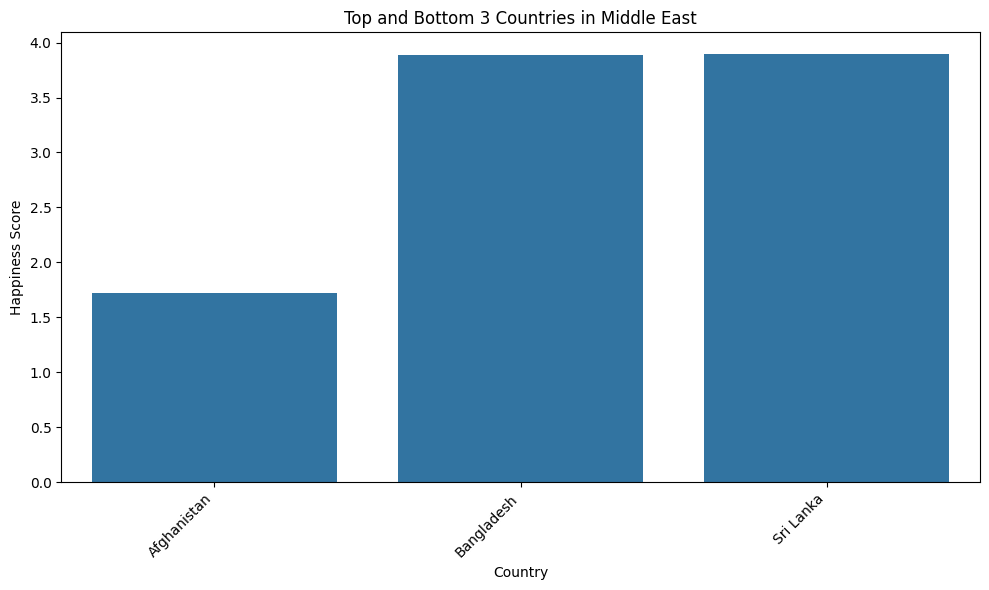

In [ ]:
# Identify the top 3 and bottom 3 countries in South Asia based on 'score'
top3_south_asia = south_asia_df.nlargest(3, 'score')
bottom3_south_asia = south_asia_df.nsmallest(3, 'score')

# Identify the top 3 and bottom 3 countries in the Middle East based on 'score'
top3_middle_east = middle_east_df.nlargest(3, 'score')
bottom3_middle_east = middle_east_df.nsmallest(3, 'score')

# Add a new column 'Performance' to distinguish between top and bottom performers
top3_south_asia['Performance'] = 'Top 3'
bottom3_south_asia['Performance'] = 'Bottom 3'

top3_middle_east['Performance'] = 'Top 3'
bottom3_middle_east['Performance'] = 'Bottom 3'

# Combine the top and bottom dataframes for each region
combined_south_asia = pd.concat([top3_south_asia, bottom3_south_asia])
combined_middle_east = pd.concat([top3_middle_east, bottom3_middle_east])

# Function to plot bar charts for top and bottom performers
def plot_top_bottom_with_hue(df, region, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country name', y='score', data=bottom3_south_asia)
    plt.title(f'{title} in {region}')
    plt.xlabel('Country')
    plt.ylabel('Happiness Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the bar charts for South Asia and Middle East regions
plot_top_bottom_with_hue(combined_south_asia, 'South Asia', 'Top and Bottom 3 Countries')
plot_top_bottom_with_hue(combined_middle_east, 'Middle East', 'Top and Bottom 3 Countries')


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

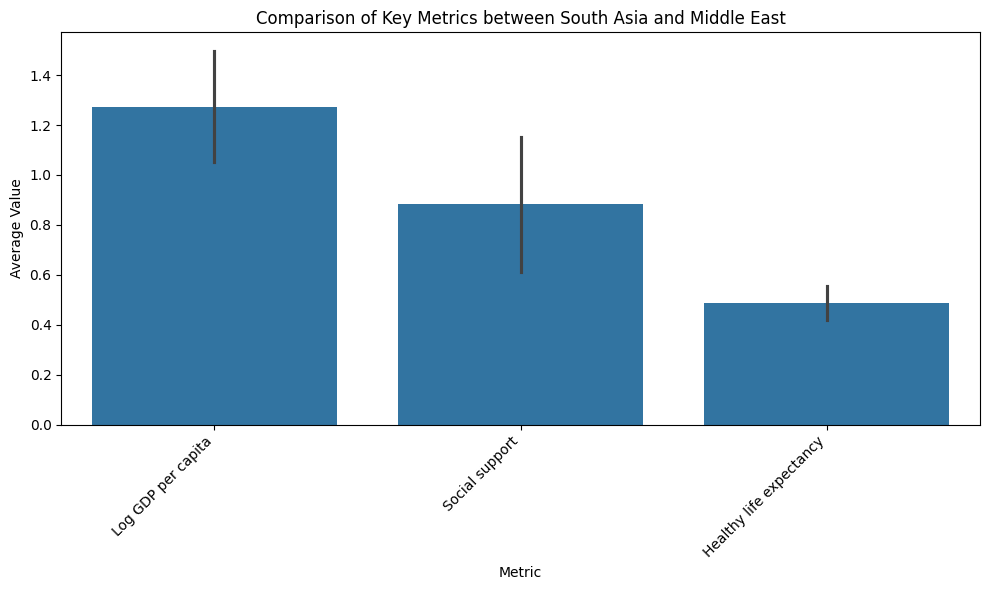

The metric with the largest disparity between the two regions is: Social support


In [ ]:
# Select relevant columns for comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
comparison_df = pd.DataFrame({
    'Metric': metrics * 2,
    'Region': ['South Asia'] * 3 + ['Middle East'] * 3,
    'Value': list(south_asia_df[metrics].mean()) + list(middle_east_df[metrics].mean())
})

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=comparison_df)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the absolute difference in means for each metric
metric_disparities = {}
for metric in metrics:
  metric_disparities[metric] = abs(south_asia_df[metric].mean() - middle_east_df[metric].mean())

# Find the metric with the largest disparity
largest_disparity_metric = max(metric_disparities, key=metric_disparities.get)
print(f"The metric with the largest disparity between the two regions is: {largest_disparity_metric}")

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:
# South Asia
range_south_asia = south_asia_df['score'].max() - south_asia_df['score'].min()
cv_south_asia = south_asia_df['score'].std() / south_asia_df['score'].mean()

# Middle East
range_middle_east = middle_east_df['score'].max() - middle_east_df['score'].min()
cv_middle_east = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range of Happiness Score: {range_south_asia:.2f}")
print(f"South Asia - Coefficient of Variation: {cv_south_asia:.2f}")
print(f"Middle East - Range of Happiness Score: {range_middle_east:.2f}")
print(f"Middle East - Coefficient of Variation: {cv_middle_east:.2f}")

# Determine which region has greater variability (using CV)
if cv_south_asia > cv_middle_east:
    print("\nSouth Asia has greater variability in happiness.")
elif cv_middle_east > cv_south_asia:
    print("\nMiddle East has greater variability in happiness.")
else:
    print("\nBoth regions have the same variability in happiness.")

South Asia - Range of Happiness Score: 3.44
South Asia - Coefficient of Variation: 0.30
Middle East - Range of Happiness Score: 4.63
Middle East - Coefficient of Variation: 0.29

South Asia has greater variability in happiness.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

South Asia - Correlation between Freedom to make life choices and Score: 0.8005185224163315
South Asia - Correlation between Generosity and Score: 0.874512371253192


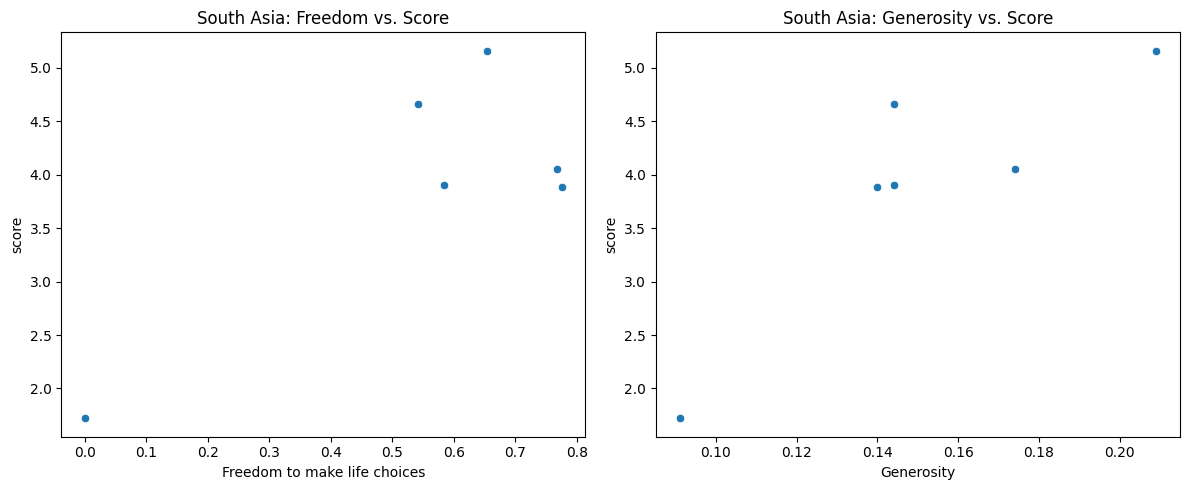


Middle East - Correlation between Freedom to make life choices and Score: 0.8632202433827543
Middle East - Correlation between Generosity and Score: 0.6275236536964182


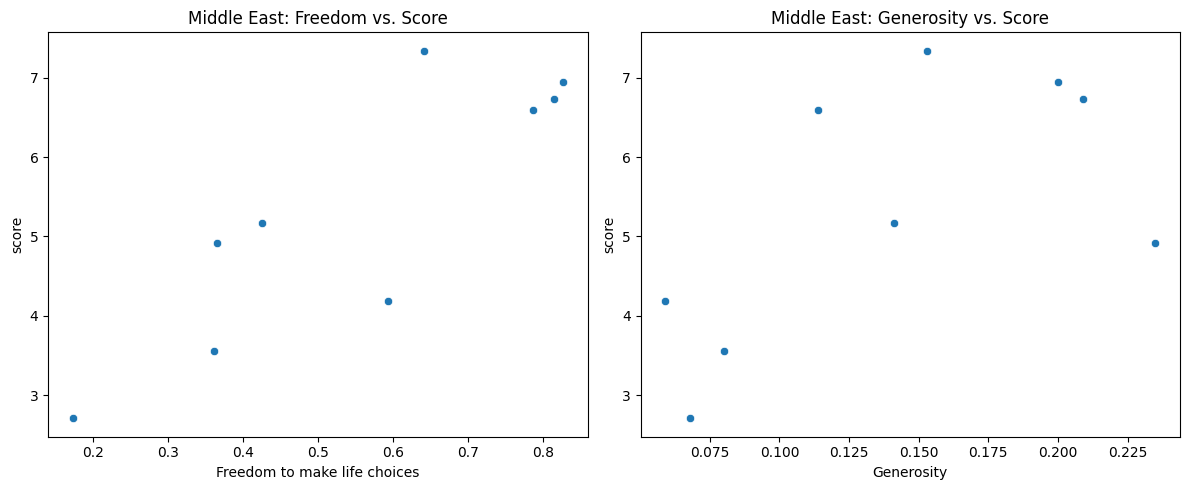

In [ ]:
# Correlation Analysis for South Asia
correlation_freedom_sa = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity_sa = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"South Asia - Correlation between Freedom to make life choices and Score: {correlation_freedom_sa}")
print(f"South Asia - Correlation between Generosity and Score: {correlation_generosity_sa}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title('South Asia: Freedom vs. Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asia_df)
plt.title('South Asia: Generosity vs. Score')

plt.tight_layout()
plt.show()


# Correlation Analysis for Middle East
correlation_freedom_me = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
correlation_generosity_me = middle_east_df['Generosity'].corr(middle_east_df['score'])

print(f"\nMiddle East - Correlation between Freedom to make life choices and Score: {correlation_freedom_me}")
print(f"Middle East - Correlation between Generosity and Score: {correlation_generosity_me}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East: Freedom vs. Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df)
plt.title('Middle East: Generosity vs. Score')

plt.tight_layout()
plt.show()

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

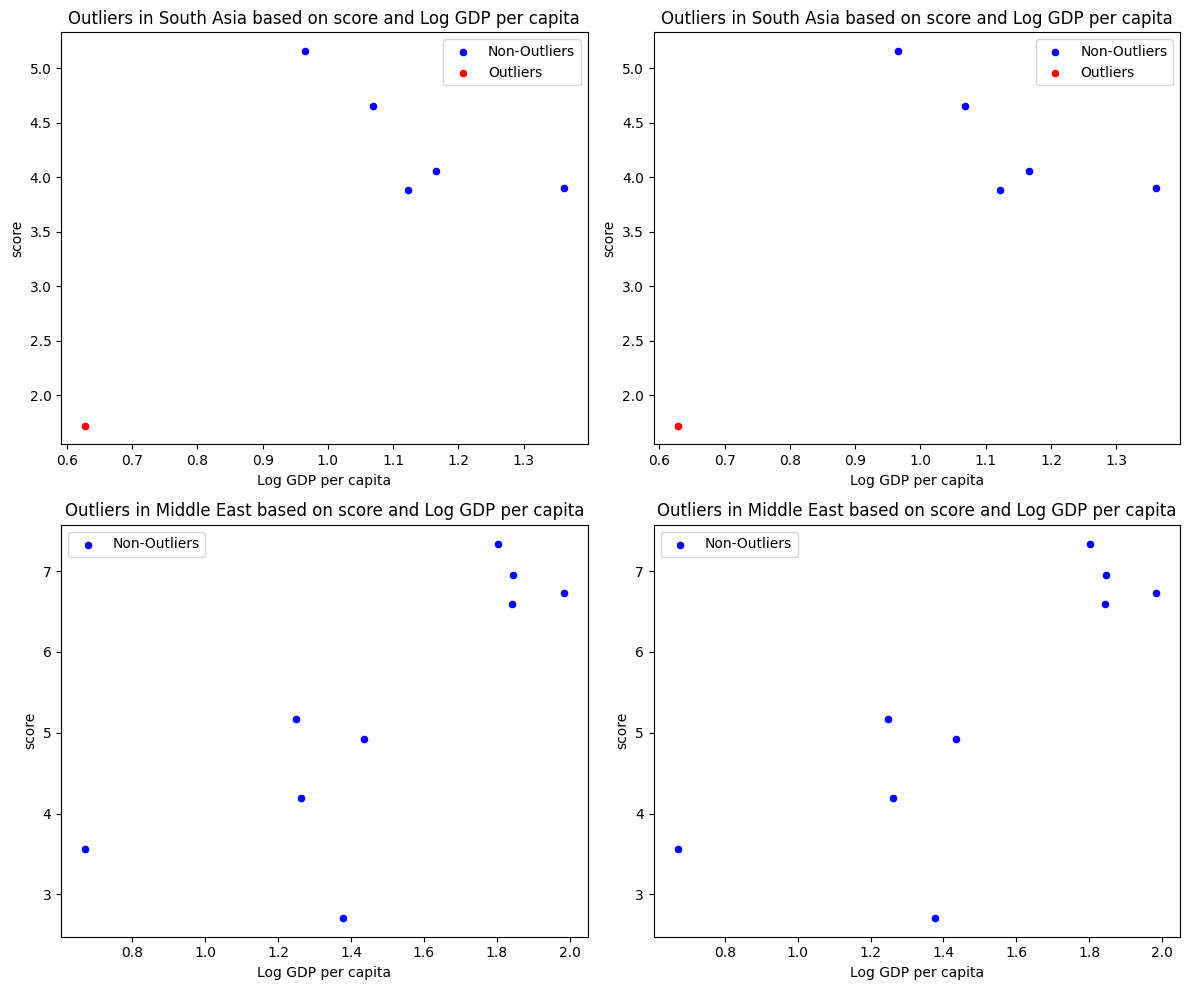

In [ ]:
# Function to identify outliers using IQR rule
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify outliers in South Asia
score_outliers_sa = identify_outliers_iqr(south_asia_df['score'])
gdp_outliers_sa = identify_outliers_iqr(south_asia_df['Log GDP per capita'])

# Identify outliers in the Middle East
score_outliers_me = identify_outliers_iqr(middle_east_df['score'])
gdp_outliers_me = identify_outliers_iqr(middle_east_df['Log GDP per capita'])

# Function to plot outliers
def plot_outliers(df, outliers, metric_x, metric_y, region_name, ax):
    sns.scatterplot(x=metric_x, y=metric_y, data=df, color='blue', label='Non-Outliers', ax=ax)
    sns.scatterplot(x=metric_x, y=metric_y, data=df.loc[outliers.index], color='red', label='Outliers', ax=ax)
    ax.set_title(f'Outliers in {region_name} based on {metric_y} and {metric_x}')
    ax.set_xlabel(metric_x)
    ax.set_ylabel(metric_y)
    ax.legend()

# Create a 2-row, 2-column grid to fit all plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot outliers for South Asia (score and GDP per capita)
plot_outliers(south_asia_df, score_outliers_sa, 'Log GDP per capita', 'score', 'South Asia', axs[0, 0])
plot_outliers(south_asia_df, gdp_outliers_sa, 'Log GDP per capita', 'score', 'South Asia', axs[0, 1])

# Plot outliers for the Middle East (score and GDP per capita)
plot_outliers(middle_east_df, score_outliers_me, 'Log GDP per capita', 'score', 'Middle East', axs[1, 0])
plot_outliers(middle_east_df, gdp_outliers_me, 'Log GDP per capita', 'score', 'Middle East', axs[1, 1])

# Adjust layout to ensure the plots fit nicely
plt.tight_layout()
plt.show()


7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

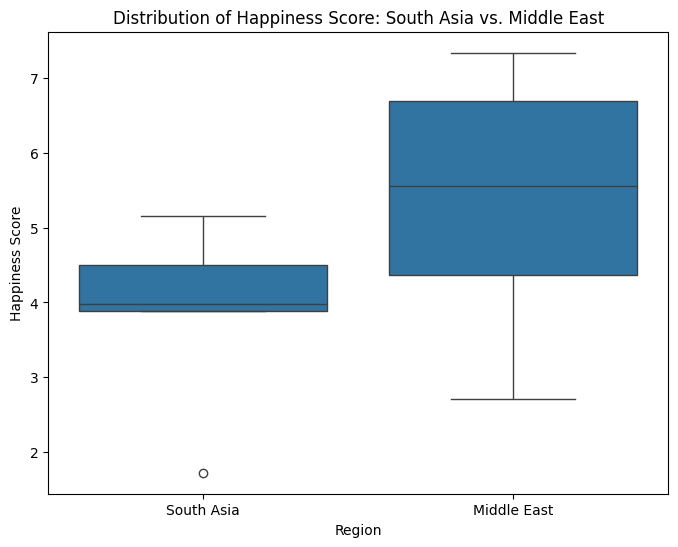

In [ ]:
# Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_df.assign(Region='South Asia'),
                                                  middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Happiness Score: South Asia vs. Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()